In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [2]:
#df_stage = pd.read_csv("../results/gene_exp_analysis/cnv_genes_exp_stage.combine.csv",
                 #header=0,sep="\t")
df = pd.read_csv("/Users/matanatmammadli/Desktop/MultiOmic_Datascience-main/results/gene_exp_analysis/cnv_genes_exp.combine.csv",
                 header=0,sep="\t")
label = pd.read_csv("/Users/matanatmammadli/Desktop/MultiOmic_Datascience-main/results/gene_exp_analysis/clinical.csv",
                    header=0,sep="\t")

In [3]:
df.shape

(246, 423)

In [4]:
df.describe()

,TCGA.2F.A9KO.01A,TCGA.2F.A9KP.01A,TCGA.2F.A9KQ.01A,TCGA.2F.A9KR.01A,TCGA.2F.A9KT.01A,TCGA.2F.A9KW.01A,TCGA.4Z.AA7M.01A,TCGA.4Z.AA7N.01A,TCGA.4Z.AA7O.01A,TCGA.4Z.AA7Q.01A,...,TCGA.ZF.AA4X.01A,TCGA.ZF.AA51.01A,TCGA.ZF.AA52.01A,TCGA.ZF.AA53.01A,TCGA.ZF.AA54.01A,TCGA.ZF.AA56.01A,TCGA.ZF.AA58.01A,TCGA.ZF.AA5H.01A,TCGA.ZF.AA5N.01A,TCGA.ZF.AA5P.01A
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,...,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,1400.401799,1482.662364,1511.649609,1382.933585,1459.193298,1491.843045,1307.088749,1424.476043,1447.701364,1475.899149,...,1326.489056,1497.952990,1282.133988,1663.101138,1545.539930,1545.194203,1639.352616,1702.837066,2290.879087,1437.747206
std,3134.762638,3691.002851,4343.956557,4036.534953,3353.163892,3596.621691,2645.819398,3415.526549,3770.350404,3525.032681,...,3293.540266,3284.541003,2686.476308,4515.157314,3753.269170,4185.916206,4483.754234,5499.421206,10170.935483,3267.968728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.215306,0.832236,0.977902,1.700264,1.177112,1.082244,1.034795,1.775615,0.350119,1.258745,...,0.760026,1.519980,1.209537,1.519011,1.043997,0.942021,0.869404,1.388143,0.000000,1.123151
50%,208.238721,88.217022,103.168658,208.707461,113.002774,143.397377,174.362910,256.576320,219.875035,236.014715,...,133.764537,193.797494,165.706593,166.331726,117.971660,154.962477,155.623267,161.024622,85.452511,216.206535
75%,1338.321463,1398.156573,1556.819934,1450.538104,1503.172316,1590.899199,1492.950079,1497.730975,1389.624227,1540.704056,...,1423.908295,1626.378972,1459.004215,1667.874291,1585.048426,1710.945885,1460.380911,1368.362247,1918.866644,1655.243538
max,27351.269919,30664.569700,54241.288504,53903.483677,27830.464424,35575.536364,21590.991792,43570.032806,45554.746137,35233.535326,...,30169.983276,21881.637079,17674.966716,57216.594648,40051.900427,50476.318439,40558.553277,75646.174478,150320.121725,32185.010238


In [5]:
label

,sample,OS,X_PATIENT,OS.time,stage
0,TCGA.2F.A9KO.01A,1,TCGA-2F-A9KO,734,4
1,TCGA.2F.A9KP.01A,1,TCGA-2F-A9KP,364,4
2,TCGA.2F.A9KQ.01A,0,TCGA-2F-A9KQ,2886,3
3,TCGA.2F.A9KR.01A,1,TCGA-2F-A9KR,3183,3
4,TCGA.2F.A9KT.01A,0,TCGA-2F-A9KT,2352,2
...,...,...,...,...,...
417,TCGA.ZF.AA56.01A,1,TCGA-ZF-AA56,259,3
418,TCGA.ZF.AA58.01A,0,TCGA-ZF-AA58,1649,4
419,TCGA.ZF.AA5H.01A,0,TCGA-ZF-AA5H,897,4
420,TCGA.ZF.AA5N.01A,1,TCGA-ZF-AA5N,168,4


In [6]:
## Comparison between stages

label2 = label[label.values  == 2]
label2 = label2.set_index('sample')
label2

label3 = label[label.values  == 3]
label3 = label3.set_index('sample')
label3

label4 = label[label.values  == 4]
label4 = label4.set_index('sample')
label4

,OS,X_PATIENT,OS.time,stage
sample,,,,
TCGA.2F.A9KO.01A,1,TCGA-2F-A9KO,734,4
TCGA.2F.A9KP.01A,1,TCGA-2F-A9KP,364,4
TCGA.4Z.AA7R.01A,1,TCGA-4Z-AA7R,522,4
TCGA.4Z.AA82.01A,1,TCGA-4Z-AA82,1556,4
TCGA.4Z.AA84.01A,0,TCGA-4Z-AA84,460,4
...,...,...,...,...
TCGA.ZF.AA4T.01A,1,TCGA-ZF-AA4T,599,4
TCGA.ZF.AA58.01A,0,TCGA-ZF-AA58,1649,4
TCGA.ZF.AA5H.01A,0,TCGA-ZF-AA5H,897,4


In [7]:
label["OS"].value_counts()

OS
0    232
1    190
Name: count, dtype: int64

In [8]:
df["genes"]

0      ENSG00000003137
1      ENSG00000004776
2      ENSG00000006659
3      ENSG00000006788
4      ENSG00000007216
            ...       
241    ENSG00000251544
242    ENSG00000252277
243    ENSG00000253057
244    ENSG00000253934
245    ENSG00000254934
Name: genes, Length: 246, dtype: object

In [9]:
genes_ensemble_id = df["genes"]
df = df.drop(["genes"],axis=1)
#genes_ensemble_id_stage = df_stage["genes"]
#df_stage = df_stage.drop(["genes"],axis=1)

In [10]:
df = df.T
#df.rename(columns=genes_ensemble_id,inplace=True)
# df_stage = df_stage.T
# df_stage.rename(columns=genes_ensemble_id_stage,inplace=True)

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
TCGA.2F.A9KO.01A,37.660194,673.452886,0.000000,2.215306,5.538264,815.232441,1195.157342,6540.689623,1881.902061,1741.230159,...,0.0,1.107653,0.000000,5.538264,6.645917,0.000000,0.000000,0.000000,0.000000,0.0
TCGA.2F.A9KP.01A,18.309193,153.131434,0.000000,2.496708,1.664472,257.160941,1639.505029,11155.292088,1542.965647,2940.289984,...,0.0,0.000000,0.000000,4.993416,1260.837624,0.000000,1.664472,0.000000,0.000000,0.0
TCGA.2F.A9KQ.01A,33.248667,30.314961,2.933706,0.977902,0.000000,165.265433,1716.217955,13077.483029,3003.136946,2985.534711,...,0.0,0.000000,0.000000,6.845314,507.531122,0.977902,0.977902,0.000000,0.977902,0.0
TCGA.2F.A9KR.01A,28.904496,355.355269,0.000000,8.501322,1.700264,232.086097,2146.583861,4040.678452,836.530107,5689.934963,...,0.0,0.850132,0.000000,1.700264,8.501322,1.700264,0.000000,0.850132,0.000000,0.0
TCGA.2F.A9KT.01A,281.329823,88.283417,0.000000,7.062673,0.000000,374.321689,5523.010577,4606.040151,1569.090601,4303.522308,...,0.0,1.177112,0.000000,2.354224,16.479571,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.ZF.AA56.01A,808.254133,163.911677,0.000000,2.826063,0.942021,697.095639,2208.097539,9813.976177,2045.127883,4111.922251,...,0.0,0.000000,0.000000,4.710106,439.923870,0.000000,0.000000,0.000000,0.000000,0.0
TCGA.ZF.AA58.01A,295.597267,190.399416,0.869404,11.302248,0.000000,1022.418783,1832.703057,11470.043373,2235.236983,7213.442724,...,0.0,0.000000,0.000000,0.869404,360.802547,0.000000,0.000000,0.000000,0.000000,0.0
TCGA.ZF.AA5H.01A,202.668920,117.992180,0.000000,8.328860,0.000000,541.375883,1420.764657,8314.978303,3356.530474,2968.544424,...,0.0,0.694072,0.000000,4.858502,880.776917,0.000000,0.000000,0.694072,0.000000,0.0
TCGA.ZF.AA5N.01A,1855.540230,15.259377,0.000000,0.000000,0.000000,3277.714156,6653.088323,20908.398212,2417.085299,6717.177706,...,0.0,0.000000,0.000000,3.051875,1327.565789,0.000000,0.000000,0.000000,0.000000,0.0


In [12]:
df2 = df.loc[label2.index]
df2

df3 = df.loc[label3.index]
df3

df4 = df.loc[label4.index]
df4


,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
sample,,,,,,,,,,,,,,,,,,,,,
TCGA.2F.A9KO.01A,37.660194,673.452886,0.000000,2.215306,5.538264,815.232441,1195.157342,6540.689623,1881.902061,1741.230159,...,0.0,1.107653,0.000000,5.538264,6.645917,0.000000,0.000000,0.000000,0.0,0.0
TCGA.2F.A9KP.01A,18.309193,153.131434,0.000000,2.496708,1.664472,257.160941,1639.505029,11155.292088,1542.965647,2940.289984,...,0.0,0.000000,0.000000,4.993416,1260.837624,0.000000,1.664472,0.000000,0.0,0.0
TCGA.4Z.AA7R.01A,60.452304,42.316613,0.000000,1.727209,11.226856,191.720163,842.877834,6794.838930,2990.661822,2423.273772,...,0.0,0.000000,0.000000,0.863604,9.499648,2.590813,1.727209,0.000000,0.0,0.0
TCGA.4Z.AA82.01A,36.798593,388.429596,0.000000,5.110916,0.000000,3889.406876,4499.650215,9708.695535,2381.686734,7978.139466,...,0.0,0.000000,0.000000,2.044366,49.064791,1.022183,0.000000,0.000000,0.0,0.0
TCGA.4Z.AA84.01A,141.166048,108.589267,43.435707,3.257678,3.257678,306.221734,846.996286,4948.412918,1273.752107,2034.962872,...,0.0,0.000000,0.000000,3.257678,16.288390,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.ZF.AA4T.01A,7.474166,45.912735,0.000000,0.000000,135.602728,67.267495,931.067552,90299.671963,1265.269552,1782.054753,...,0.0,0.000000,0.000000,0.000000,2.135476,0.000000,0.000000,0.000000,0.0,0.0
TCGA.ZF.AA58.01A,295.597267,190.399416,0.869404,11.302248,0.000000,1022.418783,1832.703057,11470.043373,2235.236983,7213.442724,...,0.0,0.000000,0.000000,0.869404,360.802547,0.000000,0.000000,0.000000,0.0,0.0
TCGA.ZF.AA5H.01A,202.668920,117.992180,0.000000,8.328860,0.000000,541.375883,1420.764657,8314.978303,3356.530474,2968.544424,...,0.0,0.694072,0.000000,4.858502,880.776917,0.000000,0.000000,0.694072,0.0,0.0


In [13]:
label= label.set_index('sample')

In [14]:
label

,OS,X_PATIENT,OS.time,stage
sample,,,,
TCGA.2F.A9KO.01A,1,TCGA-2F-A9KO,734,4
TCGA.2F.A9KP.01A,1,TCGA-2F-A9KP,364,4
TCGA.2F.A9KQ.01A,0,TCGA-2F-A9KQ,2886,3
TCGA.2F.A9KR.01A,1,TCGA-2F-A9KR,3183,3
TCGA.2F.A9KT.01A,0,TCGA-2F-A9KT,2352,2
...,...,...,...,...
TCGA.ZF.AA56.01A,1,TCGA-ZF-AA56,259,3
TCGA.ZF.AA58.01A,0,TCGA-ZF-AA58,1649,4
TCGA.ZF.AA5H.01A,0,TCGA-ZF-AA5H,897,4


In [15]:
death_label=np.array([])
for sample in df.index:
    death_label = np.append(death_label,label.loc[sample]["OS"])

In [16]:
death_label

array([1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0.

In [17]:
## Feature selection

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,-0.213370,-0.165744,-0.086159,-0.209269,-0.087313,-0.145596,-0.831648,-0.394661,-0.165389,-0.982658,...,-0.100887,0.005663,-0.107943,0.239542,-0.604693,-0.422766,-0.101153,-0.149850,-0.103449,-0.153101
1,-0.224685,-0.229428,-0.086159,-0.202471,-0.114491,-0.518407,-0.520916,0.238327,-0.410617,-0.440650,...,-0.100887,-0.178504,-0.107943,0.182871,0.746769,-0.422766,0.949423,-0.149850,-0.103449,-0.153101
2,-0.215949,-0.244460,0.020898,-0.239161,-0.126168,-0.579797,-0.467271,0.501995,0.645851,-0.420198,...,-0.100887,-0.178504,-0.107943,0.375490,-0.064961,-0.024930,0.516076,-0.149850,0.258189,-0.153101
3,-0.218490,-0.204677,-0.086159,-0.057417,-0.114240,-0.535158,-0.166317,-0.737590,-0.921740,0.802266,...,-0.100887,-0.037155,-0.107943,-0.159656,-0.602693,0.268946,-0.101153,0.491471,-0.103449,-0.153101
4,-0.070887,-0.237365,-0.086159,-0.092170,-0.126168,-0.440140,2.194811,-0.660038,-0.391715,0.175569,...,-0.100887,0.017211,-0.107943,-0.091636,-0.594096,-0.422766,-0.101153,-0.149850,-0.103449,-0.153101


In [18]:
## 1. Variance Threshold Feature Selection

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(1)
selector.fit(df)
df.columns[selector.get_support()]

Index([  0,   1,   4,   5,   6,   7,   8,   9,  11,  13,
       ...
       232, 234, 236, 237, 238, 239, 240, 241, 243, 245],
      dtype='int64', length=112)

In [19]:
## Univariate feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions


X = df
Y = death_label

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
## print(features[0:5,:])


[7.053e+00 9.904e+00 2.420e+00 6.240e+00 2.997e+00 3.214e+01 9.136e+00
 7.977e-01 6.411e+00 3.303e+00 3.147e-01 3.500e+00 8.074e-01 2.905e-03
 4.082e-02 1.846e+00 5.588e-01 4.764e+00 1.088e+00 6.588e+00 7.771e-02
 4.252e-02 7.444e-01 7.481e+00 1.589e+00 3.977e+00 5.447e-01 3.322e+00
 1.097e+00 6.957e+00 7.172e-01 3.156e+00 7.129e+00 2.228e+00 9.284e-01
 1.014e+00 4.501e+00 2.362e-03 5.956e+00 1.735e+01 1.384e+01 1.188e-01
 7.354e-01 8.643e+00 2.754e+00 3.598e+00 3.973e-01 6.064e+00 5.112e-01
 1.807e+00 2.184e-01 6.569e+00 1.220e+00 1.119e+00 1.277e+00 1.701e+00
 2.300e+00 4.585e-02 6.576e-02 1.629e+00 1.152e+00 2.831e-01 4.474e+00
 1.012e+00 7.945e-02 2.689e-01 3.947e-01 1.233e+00 1.462e+00 1.842e+00
 9.247e+00 9.555e-01 1.657e+00 1.800e-01 1.854e+00 2.907e+00 1.745e-01
 1.024e+01 8.809e-01 8.496e-01 3.470e-01 4.007e+00 1.118e+01 5.542e-04
 7.229e-01 1.144e+01 2.082e-01 5.228e-03 1.023e-01 5.151e-01 2.079e+00
 1.079e+01 1.236e+00 4.007e+00 2.820e-01 9.494e-01 1.154e-01 3.105e-03
 2.854

In [20]:
X = df
y = death_label
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
X2 = df2
y2 = label2["OS"]
# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [22]:
X3 = df3
y3 = label3["OS"]
# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [23]:
X4 = df4
y4 = label4["OS"]
# Split the data into training and testing sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=42)

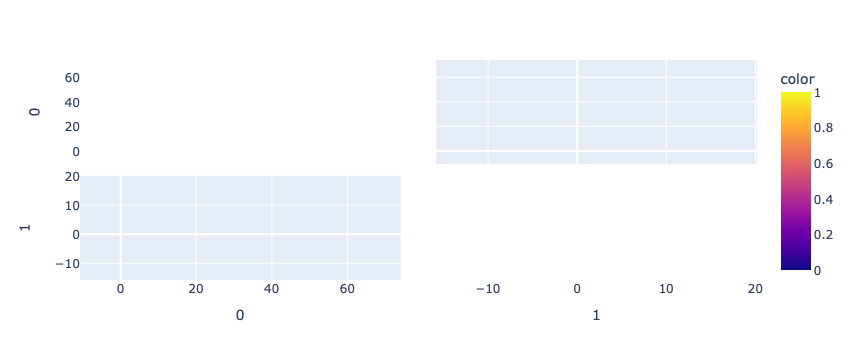

In [26]:
##!pip install pca
import plotly.express as px
from pca import pca
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)


fig = px.scatter_matrix(
    pca_result,
    labels=death_label,
    dimensions=range(2),
    color=y
)
fig.update_traces(diagonal_visible=False)
fig.show()


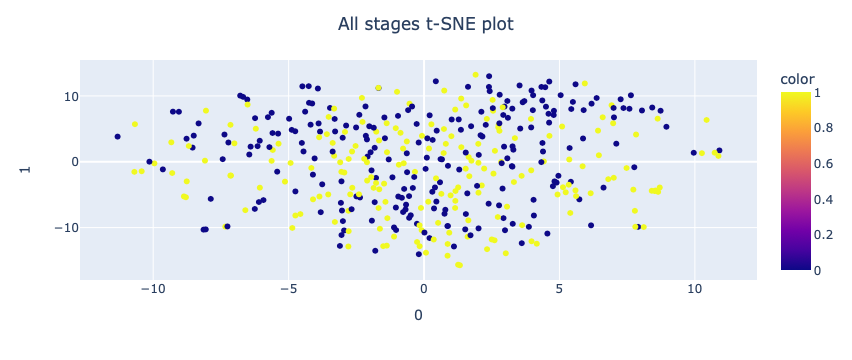

In [27]:
from sklearn.manifold import TSNE
import plotly.express as px


features = X

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=y
)

fig.update_layout(
    title={
        'text': "All stages t-SNE plot",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

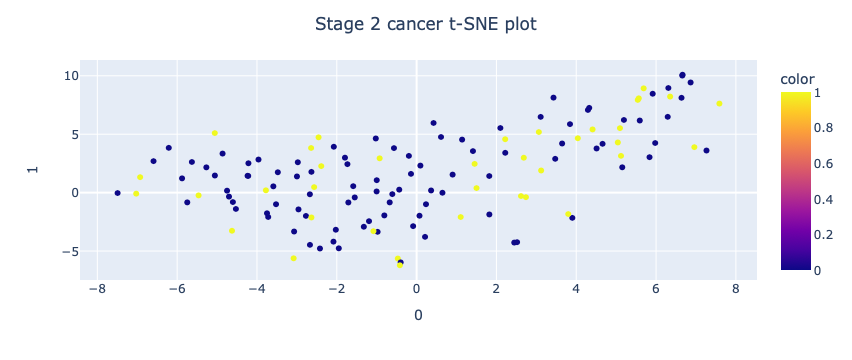

In [28]:
## Stage 2 cancer T-sne plot

from sklearn.manifold import TSNE
import plotly.express as px


features = X2

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=y2
)

fig.update_layout(
    title={
        'text': "Stage 2 cancer t-SNE plot",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

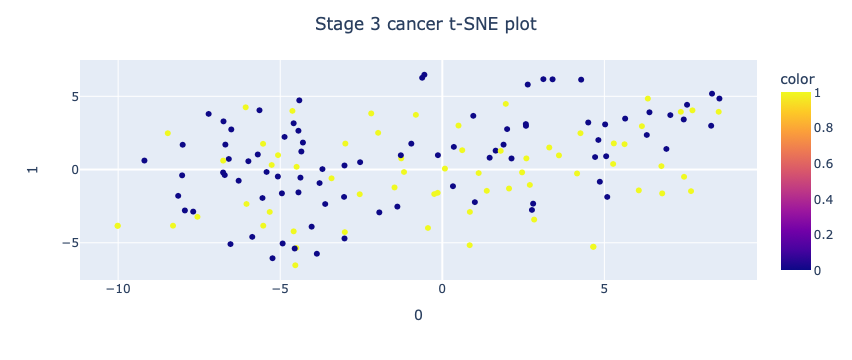

In [29]:
## Stage 3 cancer T-sne plot


from sklearn.manifold import TSNE
import plotly.express as px


features = X3

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=y3,
)

fig.update_layout(
    title={
        'text': "Stage 3 cancer t-SNE plot",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

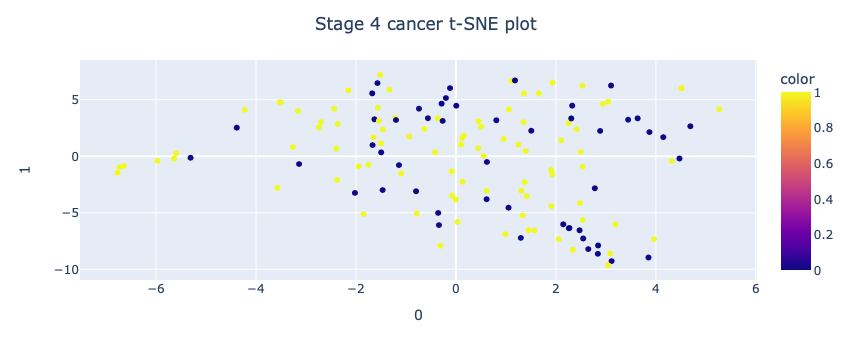

In [30]:
## Stage 4 cancer T-sne plot


from sklearn.manifold import TSNE
import plotly.express as px


features = X4

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=y4
)

fig.update_layout(
    title={
        'text': "Stage 4 cancer t-SNE plot",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

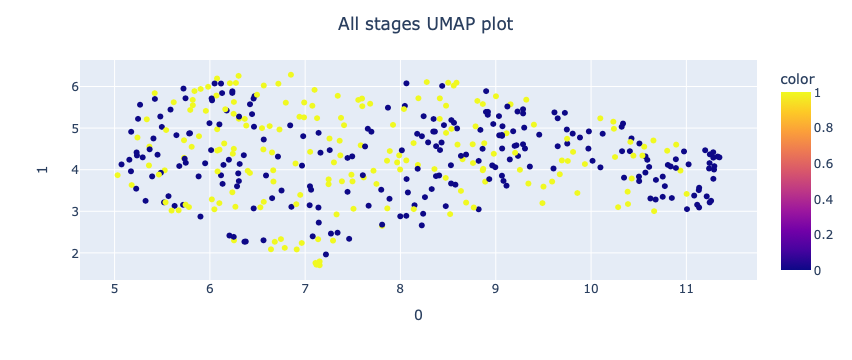

In [31]:
from umap import UMAP
import plotly.express as px

umap_2d = UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(X)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=y
)


fig_2d.update_layout(
    title={
        'text': "All stages UMAP plot",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})


fig_2d.show()



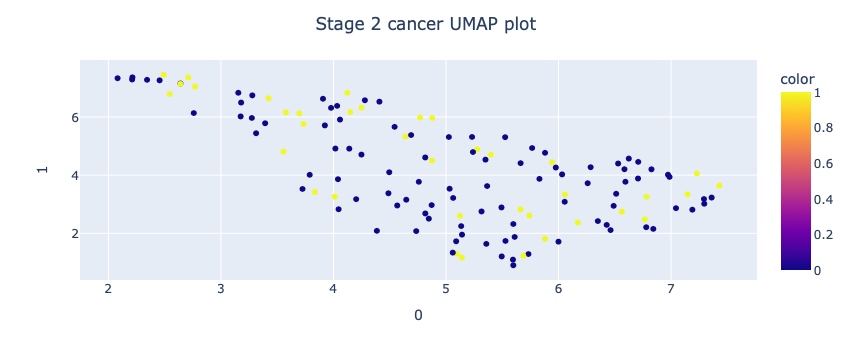

In [32]:
## Stage 2 cancer UMAP plot

from umap import UMAP
import plotly.express as px

umap_2d = UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(X2)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=y2
)

fig_2d.update_layout(
    title={
        'text': "Stage 2 cancer UMAP plot",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})


fig_2d.show()

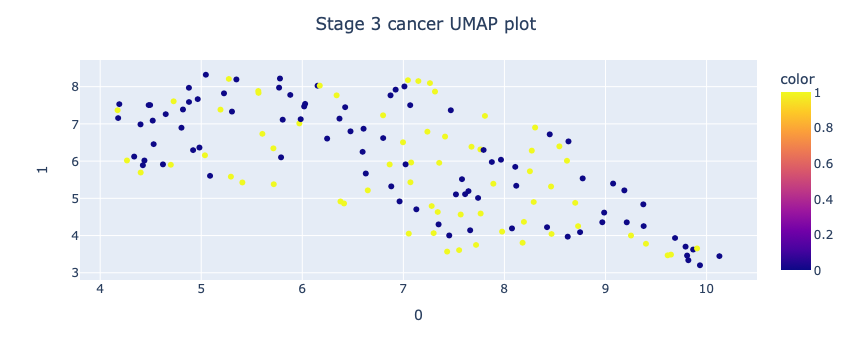

In [33]:
## Stage 3 cancer UMAP plot

from umap import UMAP
import plotly.express as px

umap_2d = UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(X3)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=y3
)

fig_2d.update_layout(
    title={
        'text': "Stage 3 cancer UMAP plot",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})


fig_2d.show()

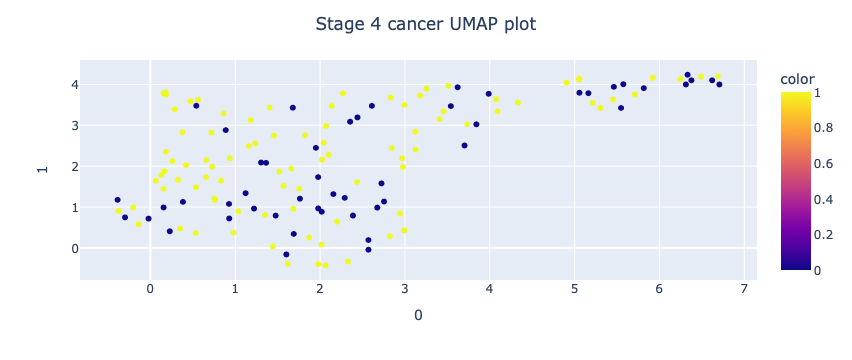

In [34]:
## Stage 4 cancer UMAP plot

from umap import UMAP
import plotly.express as px

umap_2d = UMAP(n_components=2, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(X4)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=y4
)

fig_2d.update_layout(
    title={
        'text': "Stage 4 cancer UMAP plot",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})


fig_2d.show()

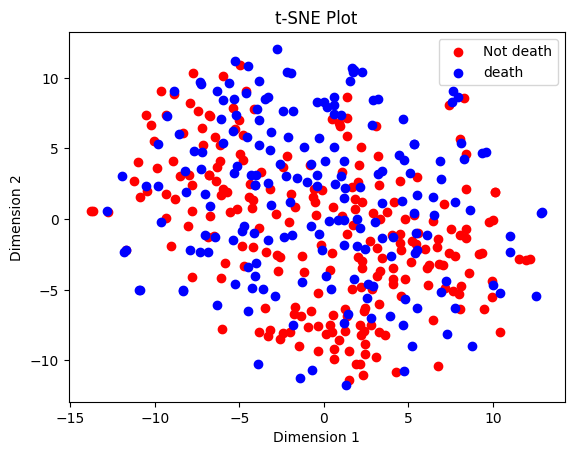

In [35]:
from sklearn.manifold import TSNE
# Assuming your data is stored in the variable 'data'
tsne = TSNE(n_components=2)
embedded_data = tsne.fit_transform(X)

# Step 2: Separate data points by class
class_1_indices = np.where(y == 0)[0]
class_2_indices = np.where(y == 1)[0]

class_1_data = embedded_data[class_1_indices]
class_2_data = embedded_data[class_2_indices]

# Step 3: Plot the t-SNE plot with different colors for each class
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], color='red', label='Not death')
plt.scatter(class_2_data[:, 0], class_2_data[:, 1], color='blue', label='death')

plt.title('t-SNE Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.savefig("/Users/matanatmammadli/Desktop/MultiOmic_Datascience-main/plots/tsne_plt.png")
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model=RandomForestClassifier(random_state=42)

# defining parameter range
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,12,14,16,20],
    'criterion' :['gini', 'entropy']
}

In [37]:
# Modelling
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
##!pip install graphviz
import graphviz

In [42]:
## Random Forest classifier for ALL stages of cancer

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6535433070866141


In [43]:
## Random Forest classifier for stage 2 cancer

rf2 = RandomForestClassifier()
rf2.fit(X_train2, y_train2)

y_pred2 = rf2.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.75


In [44]:
## Random Forest classifier for stage 3 cancer

rf3 = RandomForestClassifier()
rf3.fit(X_train3, y_train3)

y_pred3 = rf3.predict(X_test3)

accuracy3 = accuracy_score(y_test3, y_pred3)
print("Accuracy:", accuracy3)

Accuracy: 0.5555555555555556


In [45]:
## Random Forest classifier for stage 4 cancer

rf4 = RandomForestClassifier()
rf4.fit(X_train4, y_train4)

y_pred4 = rf4.predict(X_test4)

accuracy4 = accuracy_score(y_test4, y_pred4)
print("Accuracy:", accuracy4)

Accuracy: 0.5952380952380952


In [31]:
##Hyperparameter Tuning

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1355a87f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1343724a0>})

In [32]:
# Create a variable for the best model for Random Forest
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 331}


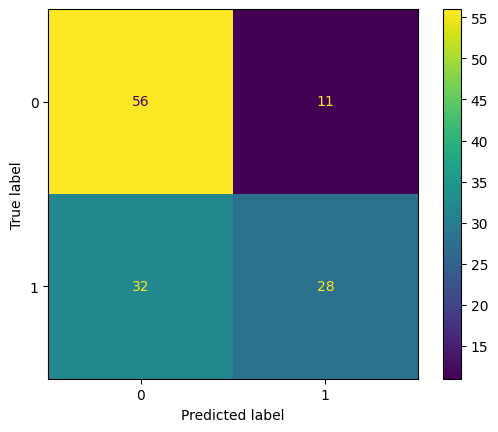

In [33]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

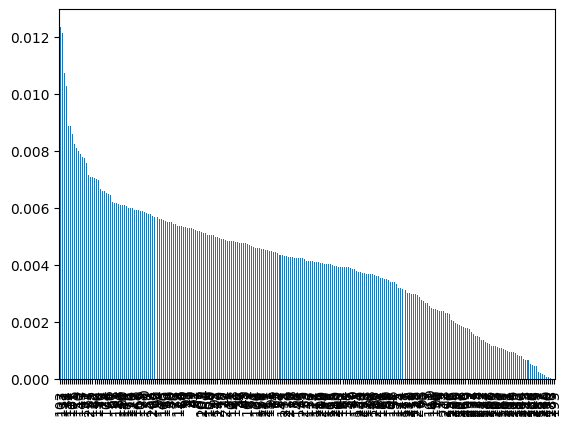

In [34]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [35]:
from sklearn.linear_model import RidgeClassifier
model=RidgeClassifier()
param_grid = {'alpha':[0.001,0.01,0.1,1 ]}

In [36]:
model = xgb.XGBClassifier(random_state=42)

# Defining parameter range
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.1 ,0.01, 0.001],
    'n_estimators': [100],
    'gamma': [ 0.1,0.01,0.001],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [ 0.5, 0.8]
}

In [37]:
grid = GridSearchCV(model, param_grid, refit = True, verbose = 1)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
              precision    recall  f1-score   support

         0.0       0.61      0.75      0.67        67
         1.0       0.62      0.47      0.53        60

    accuracy                           0.61       127
   macro avg       0.62      0.61      0.60       127
weighted avg       0.62      0.61      0.61       127



In [38]:
def roc(X_train,y_train,model,label):
    cv = StratifiedKFold(n_splits=6)
    classifier = model
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(6, 6))
    for fold, (train, test) in enumerate(cv.split(X_train, y_train)):
        classifier.fit(X_train.iloc[train], y_train[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X_train.iloc[test],
            y_train[test],
            name=f"ROC fold {fold}",
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=label,
    )
    ax.axis("square")
    ax.legend(loc="lower right")
    plt.show()


In [39]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

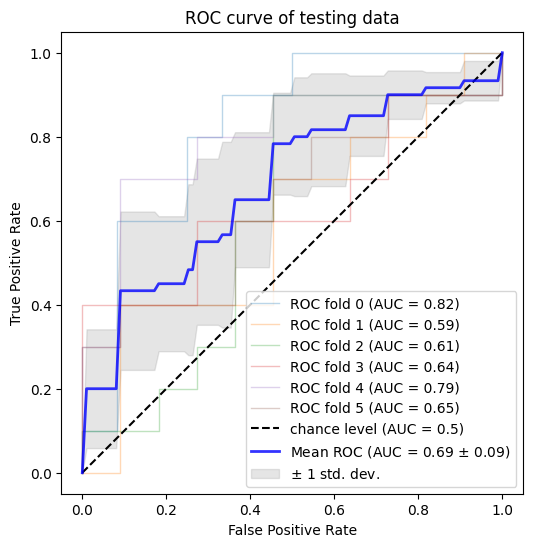

In [40]:
model = grid.best_estimator_
label="ROC curve of testing data"
roc(X_test,y_test,model,label)

In [41]:
model_RF = grid.best_estimator_
model_RF.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [42]:
# for important features:
important_feat = model_RF.feature_importances_
#get indices of those important features
idx = important_feat.argsort(kind= "quicksort")
idx= idx[::-1][:18]

In [43]:
genes_ensemble_id[idx]

52     ENSG00000132517
36     ENSG00000114480
48     ENSG00000125970
224    ENSG00000234145
137    ENSG00000169255
6      ENSG00000012232
32     ENSG00000112304
191    ENSG00000204740
5      ENSG00000007237
37     ENSG00000114738
96     ENSG00000152518
103    ENSG00000155256
28     ENSG00000108262
231    ENSG00000240427
127    ENSG00000166359
80     ENSG00000143185
1      ENSG00000004776
27     ENSG00000105355
Name: genes, dtype: object

ENSG00000184697
ENSG00000237412
ENSG00000265787
ENSG00000277586

In [45]:
label

'ROC curve of testing data'